# Homework 10

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from edge_detection import EdgeDetection

### Original image

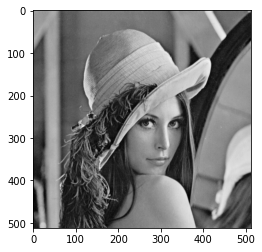

In [2]:
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

### Zero crossing edge detection

In [3]:
class ZeroCrossingEdgeDetection(EdgeDetection):
    mask_shape = (3, 3)
    
    def __init__(self):
        self.padding = self.mask_shape[0] // 2
    
    def _zero_crossing_checker(self, subimg, threshold):
        if (subimg[self.padding, self.padding] >= threshold and 
            np.sum(subimg <= -threshold) >= 1):
            return 0
        return 255
    
    def process(self, img, threshold=None):
        if threshold is None:
            threshold = self.threshold
        
        preprocessed_img = self.conv2d(img, self.kernel)
        expanded_img = self._add_padding(preprocessed_img, self.padding)
        result_img = np.zeros(img.shape, dtype='uint8')
        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                result_img[i, j] = self._zero_crossing_checker(
                        expanded_img[i: i+2*self.padding+1,
                                     j: j+2*self.padding+1],
                        threshold)
        
        return result_img

### Laplacian

In [4]:
class Laplacian1(ZeroCrossingEdgeDetection):
    kernel = np.array([[0,  1, 0],
                       [1, -4, 1],
                       [0,  1, 0]])
    threshold = 15

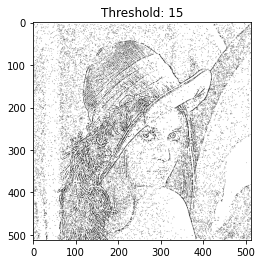

In [5]:
laplacian = Laplacian1()
result_img = laplacian.process(img)
plt.title(f'Threshold: {laplacian.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()

In [6]:
class Laplacian2(ZeroCrossingEdgeDetection):
    kernel = np.array([[1,  1, 1],
                       [1, -8, 1],
                       [1,  1, 1]]) / 3
    threshold = 15

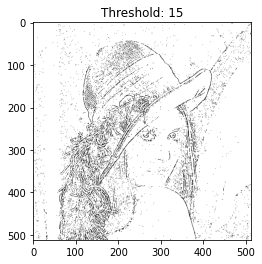

In [7]:
laplacian = Laplacian2()
result_img = laplacian.process(img)
plt.title(f'Threshold: {laplacian.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()

### Minimum-variance Laplacian

In [8]:
class MinimumVarianceLaplacian(ZeroCrossingEdgeDetection):
    kernel = np.array([[ 2, -1,  2],
                       [-1, -4, -1],
                       [ 2, -1,  2]]) / 3
    threshold = 20

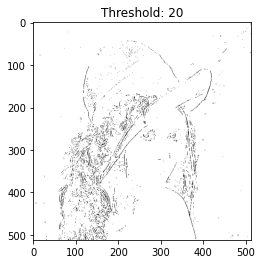

In [9]:
laplacian = MinimumVarianceLaplacian()
result_img = laplacian.process(img)
plt.title(f'Threshold: {laplacian.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()

### Laplacian of Gaussian

In [10]:
class LaplacianOfGaussian(ZeroCrossingEdgeDetection):
    kernel = np.array([[ 0,  0,   0,  -1,  -1,  -2,  -1,  -1,   0,  0,  0],
                       [ 0,  0,  -2,  -4,  -8,  -9,  -8,  -4,  -2,  0,  0],
                       [ 0, -2,  -7, -15, -22, -23, -22, -15,  -7, -2,  0],
                       [-1, -4, -15, -24, -14,  -1, -14, -24, -15, -4, -1],
                       [-1, -8, -22, -14,  52, 103,  52, -14, -22, -8, -1],
                       [-2, -9, -23,  -1, 103, 178, 103,  -1, -23, -9, -2],
                       [-1, -8, -22, -14,  52, 103,  52, -14, -22, -8, -1],
                       [-1, -4, -15, -24, -14,  -1, -14, -24, -15, -4, -1],
                       [ 0, -2,  -7, -15, -22, -23, -22, -15,  -7, -2,  0],
                       [ 0,  0,  -2,  -4,  -8,  -9,  -8,  -4,  -2,  0,  0],
                       [ 0,  0,   0,  -1,  -1,  -2,  -1,  -1,   0,  0,  0]])
    threshold = 3000

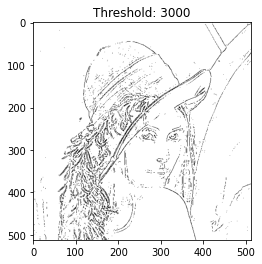

In [11]:
log = LaplacianOfGaussian()
result_img = log.process(img)
plt.title(f'Threshold: {log.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()

### Difference of Gaussian

In [12]:
class DifferenceOfGaussian(ZeroCrossingEdgeDetection):
    kernel = np.array([[-1,  -3,  -4,  -6,  -7,  -8,  -7,  -6,  -4,  -3, -1],
                       [-3,  -5,  -8, -11, -13, -13, -13, -11,  -8,  -5, -3],
                       [-4,  -8, -12, -16, -17, -17, -17, -16, -12,  -8, -4],
                       [-6, -11, -16, -16,   0,  15,   0, -16, -16, -11, -6],
                       [-7, -13, -17,   0,  85, 160,  85,   0, -17, -13, -7],
                       [-8, -13, -17,  15, 160, 283, 160,  15, -17, -13, -8],
                       [-7, -13, -17,   0,  85, 160,  85,   0, -17, -13, -7],
                       [-6, -11, -16, -16,   0,  15,   0, -16, -16, -11, -6],
                       [-4,  -8, -12, -16, -17, -17, -17, -16, -12,  -8, -4],
                       [-3,  -5,  -8, -11, -13, -13, -13, -11,  -8,  -5, -3],
                       [-1,  -3,  -4,  -6,  -7,  -8,  -7,  -6,  -4,  -3, -1]])
    threshold = 1

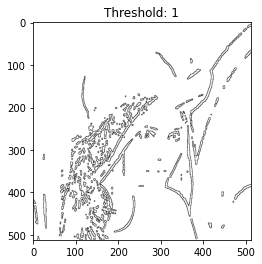

In [13]:
dog = DifferenceOfGaussian()
result_img = dog.process(img)
plt.title(f'Threshold: {dog.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()